In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset from csv file
def read_data(file):
    data = pd.read_csv(file, header=None , index_col=None)
    return data
data = read_data('data.txt')
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#shuffling and splitting of the dataset
def split_data(data):
    df = pd.DataFrame(data)
    #shuffle the dataset
    df = df.sample(frac=1)
    #split the dataset
    split = np.random.rand(len(df)) < 0.7
    train = np.asmatrix(df[split], dtype = 'float64')
    test = np.asmatrix(df[~split], dtype = 'float64')
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = test[:, :-1]
    y_test = test[:,-1]
    return X_train,y_train,X_test,y_test
X_train,y_train,X_test,y_test = split_data(data)

In [4]:
#initializing params
alpha = 0.7
epoch = 100
W = np.zeros(X_train.shape[1]+1)

In [5]:
#activation function
def activation(z):
        if z>=0:
            return 1
        else:
            return 0   

In [6]:
 #prediction function
 def predict(x):
    z = np.dot(x, W[1:]) + W[0]
    g = activation(z)
    return g

epoch:0  weight:[  9.8       -24.0156427 -24.0156427 -24.0156427 -24.0156427]  learning rate:0.7  Training Accuracy:94.64469618949536
epoch:1  weight:[ 22.4        -45.71179725 -45.71179725 -45.71179725 -45.71179725]  learning rate:0.7  Training Accuracy:94.85066941297632
epoch:2  weight:[ 35.        -68.9516618 -68.9516618 -68.9516618 -68.9516618]  learning rate:0.7  Training Accuracy:94.85066941297632
epoch:3  weight:[ 48.3        -93.07128635 -93.07128635 -93.07128635 -93.07128635]  learning rate:0.7  Training Accuracy:94.74768280123584
epoch:4  weight:[  61.6       -117.1909109 -117.1909109 -117.1909109 -117.1909109]  learning rate:0.7  Training Accuracy:94.74768280123584
epoch:5  weight:[  74.9        -141.31053545 -141.31053545 -141.31053545 -141.31053545]  learning rate:0.7  Training Accuracy:94.74768280123584
epoch:6  weight:[  87.5     -163.19891 -163.19891 -163.19891 -163.19891]  learning rate:0.7  Training Accuracy:94.85066941297632
epoch:7  weight:[ 100.1        -185.087284

epoch:59  weight:[  718.9        -1272.73408115 -1272.73408115 -1272.73408115
 -1272.73408115]  learning rate:0.7  Training Accuracy:94.95365602471678
epoch:60  weight:[  730.8       -1293.6503657 -1293.6503657 -1293.6503657 -1293.6503657]  learning rate:0.7  Training Accuracy:94.95365602471678
epoch:61  weight:[  742.7        -1314.56665025 -1314.56665025 -1314.56665025
 -1314.56665025]  learning rate:0.7  Training Accuracy:94.95365602471678
epoch:62  weight:[  754.6       -1335.4829348 -1335.4829348 -1335.4829348 -1335.4829348]  learning rate:0.7  Training Accuracy:94.95365602471678
epoch:63  weight:[  766.5        -1356.39921935 -1356.39921935 -1356.39921935
 -1356.39921935]  learning rate:0.7  Training Accuracy:94.95365602471678
epoch:64  weight:[  778.4       -1377.3155039 -1377.3155039 -1377.3155039 -1377.3155039]  learning rate:0.7  Training Accuracy:94.95365602471678
epoch:65  weight:[  790.3        -1398.23178845 -1398.23178845 -1398.23178845
 -1398.23178845]  learning rate:0.

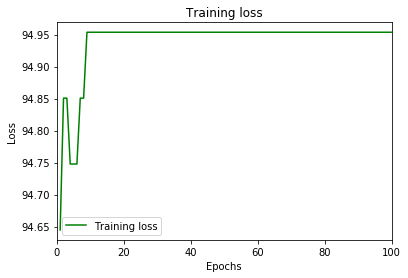

In [7]:
 #training to learn the weights
 def train(X_train, y_train):
        loss_train = []
        epochs = range(1,epoch+1)
        for i in range(epoch):
            correct = 0
            for x, y in zip(X_train, y_train):
                prediction = predict(x)
                y = np.array(y)[0][0]
                x = np.array(x)[0]
                error = y - prediction
                actual_value = int(y)
                if actual_value == prediction:
                  correct += 1
                W[1:] += alpha * error * x[0]
                W[0] += alpha * error
            training_accuracy =  correct/float(X_train.shape[0])*100.0      
            loss_train.append(training_accuracy)
            print("epoch:"+str(i)+"  weight:"+str(W)+"  learning rate:"+str(alpha)+"  Training Accuracy:"+str(training_accuracy))
        plt.plot(epochs, loss_train, 'g', label='Training loss')        
        plt.xlim(0,epoch)
        plt.title('Training loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

train(X_train, y_train)            

Predictions on test data:
X: [[-1.749   -6.332    6.0987   0.14266]] prediction: 1 Actual value:1
X: [[ 2.4287  9.3821 -3.2477 -1.4543]] prediction: 0 Actual value:0
X: [[ 0.64376  3.764   -4.4738  -4.0483 ]] prediction: 1 Actual value:1
X: [[-0.53072  -0.097265 -0.21793   1.0426  ]] prediction: 1 Actual value:1
X: [[ 0.64295  7.1018   0.3493  -0.41337]] prediction: 0 Actual value:0
X: [[ 3.8244  -3.1081   2.4537   0.52024]] prediction: 0 Actual value:0
X: [[ 0.75896  0.29176 -1.6506   0.83834]] prediction: 1 Actual value:1
X: [[-4.2333   4.9166  -0.49212 -5.3207 ]] prediction: 1 Actual value:1
X: [[2.6719  3.0646  0.37158 0.58619]] prediction: 0 Actual value:0
X: [[1.8799  2.4707  2.4931  0.37671]] prediction: 0 Actual value:0
X: [[-1.8076  -8.8131   8.7086  -0.21682]] prediction: 1 Actual value:1
X: [[-1.2369  -1.6906   2.518    0.51636]] prediction: 1 Actual value:1
X: [[-2.4458   1.6285  -0.88541 -1.4802 ]] prediction: 1 Actual value:1
X: [[1.3562  3.2136  4.3465  0.78662]] predict

X: [[4.4682  2.2907  0.95766 0.83058]] prediction: 0 Actual value:0
X: [[ 1.1676   9.1566  -2.0867  -0.80647]] prediction: 0 Actual value:0
X: [[-3.9172   2.6652   0.78886 -0.7819 ]] prediction: 1 Actual value:1
X: [[ 4.3239 -4.8835  3.4356 -0.5776]] prediction: 0 Actual value:0
X: [[-1.3389  1.552   7.0806  1.031 ]] prediction: 0 Actual value:0
X: [[1.3114  4.5462  2.2935  0.22541]] prediction: 0 Actual value:0
X: [[ 2.5503  -4.9518   6.3729  -0.41596]] prediction: 0 Actual value:0
X: [[-1.2792   2.1376  -0.47584 -1.3974 ]] prediction: 1 Actual value:1
X: [[-0.278   8.1881 -3.1338 -2.5276]] prediction: 0 Actual value:0
X: [[-2.258   -9.3263   9.3727  -0.85949]] prediction: 1 Actual value:1
X: [[ 4.3848 -3.0729  3.0423  1.2741]] prediction: 0 Actual value:0
X: [[2.0153  1.8479  3.1375  0.42843]] prediction: 0 Actual value:0
X: [[ 2.1265   6.8783   0.44784 -2.2224 ]] prediction: 0 Actual value:0
X: [[-0.7351  1.7361 -1.4938 -1.1582]] prediction: 1 Actual value:1
X: [[-4.3967   4.9601  -

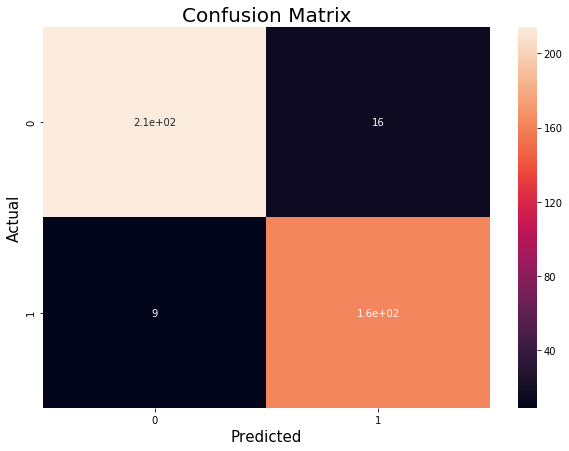

In [8]:
#Testset accuracy, Confusion Matrix and Accuracy metrics
def test(X_test, y_test):
    print("Predictions on test data:")
    correct = 0
    tp,fp,tn,fn = 0,0,0,0
    for x,y in zip(X_test,y_test):
        prediction = predict(x)
        actual_value = int(np.array(y)[0][0])
        print("X: "+str(x)+" prediction: "+str(prediction)+" Actual value:"+str(actual_value))
        if actual_value == prediction:
          correct += 1
        if actual_value == 0 and prediction == 0:
          tp += 1
        if actual_value == 1 and prediction ==1:
          tn += 1
        if actual_value == 0 and prediction ==1:
          fn += 1
        if actual_value == 1 and prediction == 0:
          fp += 1  
    test_accuracy =  correct/float(X_test.shape[0])*100.0
    print("Test Accuracy:"+str(test_accuracy))
    print()
    print("Accuracy metrics:")
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print("Accuracy: "+str(accuracy))
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print()    
    print("Confusion matrix:")
    cm = [[tp,fp],[fn,tn]]
    print(cm)
    print()
    df_cm = pd.DataFrame(cm, range(2), range(2))
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True)
    plt.title('Confusion Matrix', fontsize = 20) 
    plt.xlabel('Predicted', fontsize = 15) 
    plt.ylabel('Actual', fontsize = 15) 

plt.show()
test(X_test, y_test)
